<a href="https://colab.research.google.com/github/bigairboy/Stat-6289/blob/main/Stat6289_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import math
import matplotlib.pyplot as plt
import keras
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from pandas import DataFrame,Series

# Load the data and inspect them
data = pd.read_csv("//content/drive/MyDrive/TSLA.csv")
print('Number observations:', data.shape)
data.head(20)

Number observations: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
5,2015-07-17,54.500000,55.108002,53.650002,54.931999,54.931999,25020500
6,2015-07-20,55.000000,57.330002,54.507999,56.452000,56.452000,24892500
7,2015-07-21,54.009998,54.700001,53.310001,53.354000,53.354000,30543500
8,2015-07-22,52.254002,53.888000,52.172001,53.574001,53.574001,15525000
9,2015-07-23,53.930000,53.980000,53.054001,53.439999,53.439999,11136000


In [4]:
# Split the data into training and test sets
training_set = data.iloc[:800, 1:2].values
test_set = data.iloc[800:, 1:2].values

In [9]:
# Build the input feature with 1 day
sk = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sk.fit_transform(training_set)
X_train = []
y_train = []
for n in range(60, 800):
    X_train.append(training_set_scaled[n-60:n:1, 0])
    y_train.append(training_set_scaled[n, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.49064944]
  [0.49077223]
  [0.49015835]
  ...
  [0.44882765]
  [0.43045381]
  [0.38171624]]

 [[0.49077223]
  [0.49015835]
  [0.50914599]
  ...
  [0.43045381]
  [0.38171624]
  [0.43589644]]

 [[0.49015835]
  [0.50914599]
  [0.4988338 ]
  ...
  [0.38171624]
  [0.43589644]
  [0.39972175]]

 ...

 [[0.83639574]
  [0.84016048]
  [0.86557271]
  ...
  [0.63272909]
  [0.58407332]
  [0.5830503 ]]

 [[0.84016048]
  [0.86557271]
  [0.87195655]
  ...
  [0.58407332]
  [0.5830503 ]
  [0.48197407]]

 [[0.86557271]
  [0.87195655]
  [0.91189591]
  ...
  [0.5830503 ]
  [0.48197407]
  [0.53582684]]]


In [10]:
# Build the input feature with 7 days
sk = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sk.fit_transform(training_set)
X_train = []
y_train = []
for n in range(60, 800):
    X_train.append(training_set_scaled[n-60:n:7, 0])
    y_train.append(training_set_scaled[n, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.49064944]
  [0.52269098]
  [0.49257272]
  ...
  [0.44903222]
  [0.47321684]
  [0.44252567]]

 [[0.49077223]
  [0.48676194]
  [0.51266524]
  ...
  [0.42930801]
  [0.49785166]
  [0.44882765]]

 [[0.49015835]
  [0.52105416]
  [0.5073045 ]
  ...
  [0.43098582]
  [0.47759547]
  [0.43045381]]

 ...

 [[0.83639574]
  [0.85616077]
  [0.77517699]
  ...
  [0.89540452]
  [0.73065446]
  [0.65343544]]

 [[0.84016048]
  [0.76850686]
  [0.70155913]
  ...
  [0.88443763]
  [0.72357493]
  [0.63272909]]

 [[0.86557271]
  [0.79277328]
  [0.6655073 ]
  ...
  [0.81675341]
  [0.72995869]
  [0.58407332]]]


In [11]:
# Build the input feature with 14 days
sk = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sk.fit_transform(training_set)
X_train = []
y_train = []
for n in range(60, 800):
    X_train.append(training_set_scaled[n-60:n:14, 0])
    y_train.append(training_set_scaled[n, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.49064944]
  [0.49257272]
  [0.48291531]
  [0.44903222]
  [0.44252567]]

 [[0.49077223]
  [0.51266524]
  [0.44907312]
  [0.42930801]
  [0.44882765]]

 [[0.49015835]
  [0.5073045 ]
  [0.38335314]
  [0.43098582]
  [0.43045381]]

 ...

 [[0.83639574]
  [0.77517699]
  [0.66333839]
  [0.89540452]
  [0.65343544]]

 [[0.84016048]
  [0.70155913]
  [0.63191066]
  [0.88443763]
  [0.63272909]]

 [[0.86557271]
  [0.6655073 ]
  [0.66509806]
  [0.81675341]
  [0.58407332]]]


In [14]:
# 4 Hidden layers, batch size 32, dropout 0.2, epoch 100
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 11ms/step - loss: 0.1487
Epoch 2/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0401
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0289
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0240
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0239
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0236
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0254
Epoch 9/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0235
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 11/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0218
Epoch 12/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0217
Epoch 13/100
24/24 [=====

In [15]:
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sk.transform(inputs)
X_test = []
for n in range(60, 520): 
    X_test.append(inputs[n-5:n, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sk.inverse_transform(predicted_stock_price)

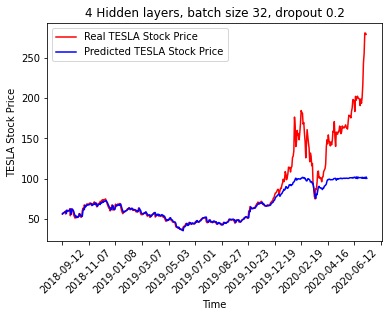

In [17]:
# Testing result
plt.plot(data.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,520,40),rotation=45)
plt.title('4 Hidden layers, batch size 32, dropout 0.2')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [19]:
# 6 Hidden layers, batch size 32, dropout 0.2
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 15ms/step - loss: 0.1663
Epoch 2/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0547
Epoch 3/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0362
Epoch 4/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0275
Epoch 5/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0280
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0234
Epoch 7/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0243
Epoch 8/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0224
Epoch 9/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0237
Epoch 10/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0210
Epoch 11/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0221
Epoch 12/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0204
Epoch 13/100
24/24 [=====

In [44]:
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sk.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [45]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sk.inverse_transform(predicted_stock_price)

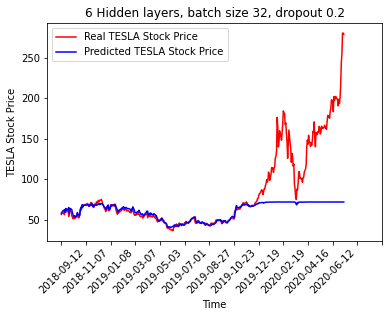

In [46]:
# Testing Result
plt.plot(data.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,548,40),rotation=45)
plt.title('6 Hidden layers, batch size 32, dropout 0.2')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [47]:
# 4 Hidden layers, batch size 16, dropout 0.2
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
47/47 [==============================] - 10s 12ms/step - loss: 0.1099
Epoch 2/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0303
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0238
Epoch 4/100
47/47 [==============================] - 1s 11ms/step - loss: 0.0244
Epoch 5/100
47/47 [==============================] - 0s 10ms/step - loss: 0.0233
Epoch 6/100
47/47 [==============================] - 1s 11ms/step - loss: 0.0228
Epoch 7/100
47/47 [==============================] - 1s 11ms/step - loss: 0.0214
Epoch 8/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0213
Epoch 9/100
47/47 [==============================] - 1s 11ms/step - loss: 0.0216
Epoch 10/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0198
Epoch 11/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0213
Epoch 12/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0184
Epoch 13/100
47/47 [====

In [55]:
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sk.transform(inputs)
X_test = []
for n in range(60, 520): 
    X_test.append(inputs[n-5:n, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [56]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sk.inverse_transform(predicted_stock_price)

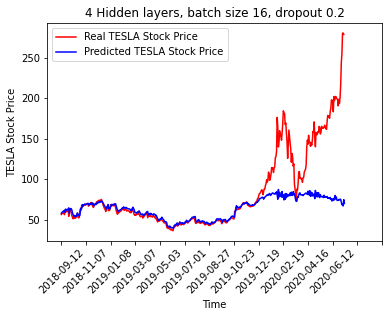

In [58]:
# Testing Result
plt.plot(data.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,548,40),rotation=45)
plt.title('4 Hidden layers, batch size 16, dropout 0.2')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()